In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! ls 'drive/My Drive/프로젝트/kt_intern'

cluster_final.csv	     wine_data_drop.csv
Clustering_final.ipynb	     wine_data_onehotencoding.csv
data_clustering_final.ipynb  wine_data_preprocessing.ipynb
target.csv		     wine_DNN.ipynb


In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import cm

In [30]:
path = 'drive/My Drive/프로젝트/kt_intern/preprocessed_data.csv'

df_test = pd.read_csv(path, encoding='cp949')
df_test.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_test

,품종_가르가네가 (Garganega),품종_가르나차 (Garnacha),품종_가르나차 (Garnatxa),품종_가르나차 틴토레라 (Garnacha Tintorera),품종_가메이 (Gamay),품종_게뷔르츠트라미너 (Gewurztraminer),품종_고데요 (Godello),품종_그레케토 비앙코 (Grechetto Bianco),품종_그레코 비앙코 (Greco Bianco),품종_그로 만생 (Gros Manseng),품종_그뤼너 벨트리너 (Gruner Veltliner),품종_그르나슈 (Grenache),품종_그르나슈 블랑 (Grenache Blanc),품종_그릴로 (Grillo),품종_글레라 (Glera),품종_까넬리 모스카토 (Canelli Moscato),품종_까리냥 (Carignan/Carignane),품종_까리네나 (Carinena),품종_나스세따 (Nascetta),품종_네그로아마로 (Negroamaro),품종_네렐로 마스칼레제 (Nerello Mascalese),품종_네로 다볼라 (Nero d'Avola),품종_네로 디 트로이아 (Nero di Troia),품종_네비올로 (Nebbiolo),품종_돈펠더 (Dornfelder),품종_돌체토 (Dolcetto),품종_따나 (Tannat),품종_라그레인 (Lagrein),품종_라보소 (Raboso),품종_라크리마 (Lacrima),품종_람브루스코 (Lambrusco),품종_레불라 (Rebula),품종_레포스코 (Refosco),품종_로트기플러 (Rotgipfler),품종_루산느 (Roussanne),품종_리바너 (Rivaner),품종_리볼라 지알라 (Ribolla Gialla),품종_리슬링 (Riesling),품종_리켓사이텔리 (Rkatsiteli),품종_마르산느 (Marsanne),...,품종_프로세코 (Prosecco),품종_프루놀로 젠타일 (Prugnolo Gentile),품종_프리미티보 (Primitivo),품종_프리울라노 (Friulano),품종_플라바치 말리 (Plavac Mali),품종_피노 그리 (Pinot Gris),품종_피노 그리지오 (Pinot Grigio),품종_피노 네로 (Pinot Nero),품종_피노 누아 (Pinot Noir),품종_피노 뮈니에 (Pinot Meunier),품종_피노 블랑 (Pinot Blanc),품종_피노 비앙코 (Pinot Bianco),품종_피노타주 (Pinotage),품종_피뇰레또 (Pignoletto),품종_피아노 (Fiano),품종_훅셀레베 (Huxelrebe),당도_0,당도_1,당도_2,당도_3,당도_4,당도_5,산도_0,산도_1,산도_2,산도_3,산도_4,산도_5,바디_0,바디_1,바디_2,바디_3,바디_4,바디_5,타닌_0,타닌_1,타닌_2,타닌_3,타닌_4,타닌_5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
11644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
11645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
11646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [5]:
test_data=df_test.to_numpy()
test_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [7]:
## 최적 클러스터 갯수 정하기
def elbow(X):
    see = []
    for i in range(1,20):
        km = cluster.KMeans(n_clusters=i,random_state=0)
        km.fit(X)
        see.append(km.inertia_)
    plt.figure(figsize=(10,10))
    plt.plot(range(1,20), see, marker='o')
    plt.show()

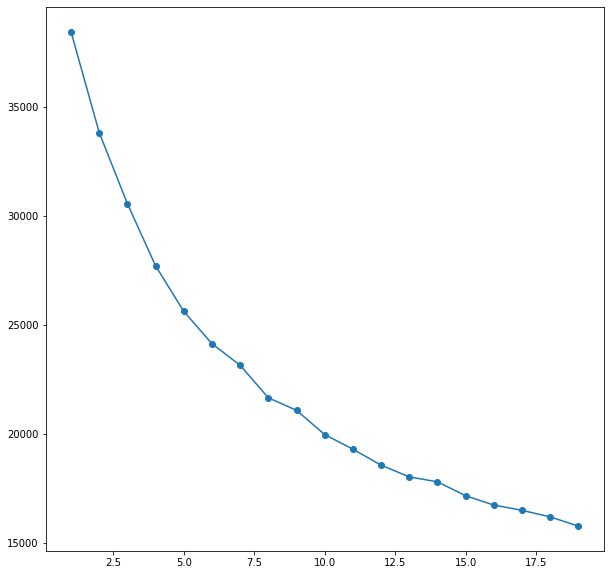

In [8]:
## 클러스터 갯수 = 8
elbow(df_test)

In [20]:
# 군집화(K-Means)
model = cluster.KMeans(n_clusters=8)
model.fit(df_test)
predict = model.labels_

In [21]:
## 군집별 데이터 분포 확인
for i in range(8):
    idx = np.where(predict==i)
    print(len(idx[0]))

1731
1299
946
1233
1814
2082
1163
1380


In [29]:
## 임시 검증
a=[9488, 10080, 10081]
lists=[]
for i in a:
    lists.append(predict[i])
count={}
for i in lists:
    try: count[i] += 1
    except: count[i]=1
print(count)
print(len(a))

{7: 3}
3


In [28]:
predict

array([3, 3, 5, ..., 7, 0, 5], dtype=int32)

In [26]:
## target data 저장
df = pd.DataFrame(predict)
df.to_csv('drive/My Drive/프로젝트/kt_intern/target.csv', index=False)